# Car Price Prediction Dataset Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/car_price_prediction_.csv')

## Executive Summary

This project performs a complete exploratory data analysis (EDA) on a car sales dataset. The analysis covers data understanding, data quality checks, cleaning, and visual exploration of both numerical and categorical features. The results show that all variables exhibit uniform, independent patterns with no meaningful relationships among them, and several unrealistic values suggest that the dataset is synthetically generated.

While the dataset is suitable for practicing EDA techniques, it does not reflect real-world automotive market behavior. The project concludes with insights about feature independence, limitations of the data, and recommendations for using more realistic datasets in future analysis.


## 1 Dataset Exploration Summary

### Dataset Overview 

- This dataset contains 2,500 car listings with key fields such as price, mileage, year, brand, model, engine size, fuel type, transmission, and condition.
- The data is clean (no missing values) and structured, making it suitable for analysis.

### Why I Selected This Dataset
- Has realistic numerical patterns compared to the other explored datasets.
- Includes multiple meaningful predictors of price (mileage, year, engine size, condition).
- Easier to analyze than text-heavy datasets like IMDB and more trustworthy than synthetic AI Jobs data.

### Initial Analysis Focus
- Identify which factors have the strongest impact on car price.
- Compare depreciation patterns across different brands.

## 2 Data Quality Check

In [3]:
# 2.1 Missing Values Check
df.isna().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

All columns contain 0 missing values.
The dataset is complete and does not require any missing-value imputation at this stage.

In [4]:
# 2.2 Duplicate Rows Check
df.duplicated().sum()

np.int64(0)

The dataset contains 0 duplicate rows.
No deduplication is required.

In [5]:
# 2.3 Category Consistency Check
for col in df.select_dtypes(include='object'):
    print(f"=== {col} ===")
    print(df[col].unique(), "\n")

=== Brand ===
['Tesla' 'BMW' 'Audi' 'Ford' 'Honda' 'Mercedes' 'Toyota'] 

=== Fuel Type ===
['Petrol' 'Electric' 'Diesel' 'Hybrid'] 

=== Transmission ===
['Manual' 'Automatic'] 

=== Condition ===
['New' 'Used' 'Like New'] 

=== Model ===
['Model X' '5 Series' 'A4' 'Model Y' 'Mustang' 'Q7' 'Q5' 'Civic'
 'Explorer' 'Model 3' 'Fiesta' 'X3' 'GLA' 'A3' 'X5' 'C-Class' 'E-Class'
 'CR-V' 'Camry' 'Accord' 'GLC' 'Corolla' 'Fit' 'Model S' 'Prius'
 '3 Series' 'RAV4' 'Focus'] 



All categorical fields show clean and consistent category labels.
There are no spelling inconsistencies, no duplicated variants, and no formatting issues across “Brand”, “Fuel Type”, “Transmission”, “Condition”, and “Model”.
No corrections are required at this stage.

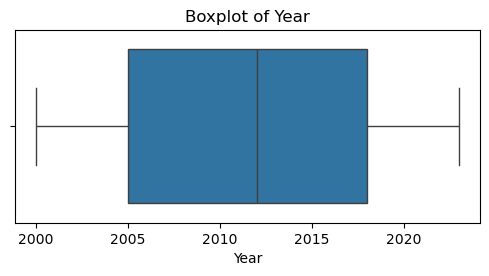

In [6]:
# 2.4 Numerical Outlier Check (Boxplots)
plt.figure(figsize=(6, 2.5))
sns.boxplot(x=df['Year'])
plt.title(f"Boxplot of {'Year'}")
plt.show()

Year ranges from 2000–2023 (reasonable for modern vehicles).

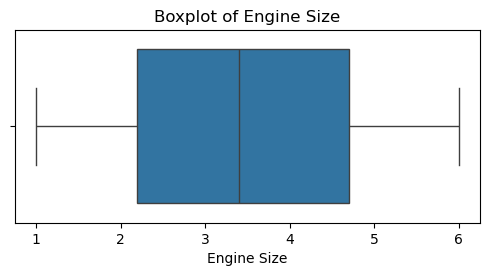

In [7]:
plt.figure(figsize=(6, 2.5))
sns.boxplot(x=df['Engine Size'])
plt.title(f"Boxplot of {'Engine Size'}")
plt.show()

Engine Size spans 1.0–6.0 liters (typical for passenger cars).

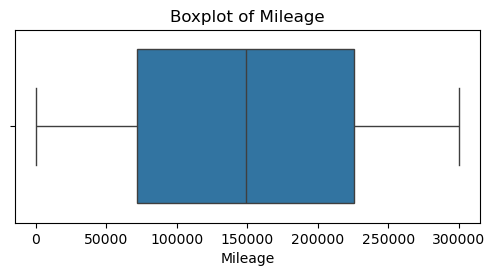

In [8]:
plt.figure(figsize=(6, 2.5))
sns.boxplot(x=df['Mileage'])
plt.title(f"Boxplot of {'Mileage'}")
plt.show()

Mileage ranges from 15 to ~300,000 km (normal for used cars; high mileage is expected, not an error).

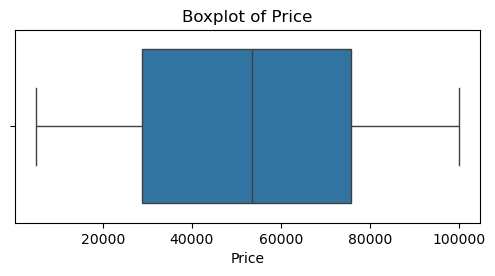

In [9]:
plt.figure(figsize=(6, 2.5))
sns.boxplot(x=df['Price'])
plt.title(f"Boxplot of {'Price'}")
plt.show()

Price falls between `$5,000` and `$100,000` (reasonable across different brands/models).

In [10]:
# 2.5 Logical Consistency Check
# Old cars mileage check
df[df['Year'] < 2005].sort_values(by='Mileage').head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
2256,2257,Audi,2004,1.3,Electric,Automatic,244,Like New,90253.66,Q7
898,899,Tesla,2003,2.5,Diesel,Automatic,1919,Like New,61313.37,Model 3
487,488,Toyota,2003,4.1,Electric,Manual,2419,Used,41275.26,Prius
1523,1524,Toyota,2004,2.0,Petrol,Manual,2994,New,24368.44,Corolla
862,863,Audi,2003,5.7,Petrol,Automatic,3060,Used,83183.16,A4


Several vehicles manufactured before 2005 show unrealistically low mileages (e.g., 244 km, 1,919 km, 2,419 km).
For 20-year-old cars, such low mileage is not plausible in real-world scenarios.
These records appear to be synthetic or logically inconsistent, and they should be noted as anomalies during the cleaning stage.

Also, the dataset contains cars labeled as Tesla with a manufacturing year of 2003, which is not historically possible, since Tesla did not mass-produce commercial vehicles until 2008.
This indicates a brand–year inconsistency and suggests that the dataset contains synthetic or logically inaccurate entries.

In [11]:
# New cars mileage check
df[df['Year'] > 2020].sort_values(by='Mileage', ascending=False).head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
1949,1950,Honda,2022,2.6,Petrol,Automatic,298962,Used,31874.18,Civic
991,992,Tesla,2021,6.0,Electric,Automatic,296508,New,36672.73,Model X
872,873,BMW,2021,4.8,Petrol,Automatic,295759,Used,18781.21,X3
1175,1176,Tesla,2023,3.3,Petrol,Manual,295531,Like New,88851.63,Model X
215,216,Toyota,2023,5.4,Petrol,Manual,294458,Used,19655.11,Corolla


Vehicles from 2021–2023 show extremely high mileages (~295,000 km), which is unrealistic for cars that are only 1–3 years old.
Such mileage levels are inconsistent with typical vehicle usage patterns and indicate logical anomalies in the dataset.
These entries should be flagged as unrealistic cases during data cleaning.

## 3 Data Cleaning

In [12]:
# 3.1 Missing Value Handling 
# All columns contain 0 missing values. No imputation is required for this dataset.
# 3.2 Duplicate Handling 
# No duplicate rows were found. No deduplication is required.
# 3.3 Category Cleaning
# All category fields contain consistent labels. No correction is needed.
# 3.4 Numerical Value Outlier Cleaning
# There are no obvious outliers among numerical values

In [13]:
#3.5.1 Flag logical inconsistencies
df_clean = df.copy()

df_clean['Anomaly'] = (
    ((df_clean['Brand'] == 'Tesla') & (df_clean['Year'] < 2008)) |         # Tesla didn't exist pre-2008
    ((df_clean['Year'] > 2020) & (df_clean['Mileage'] > 200000)) |        # New cars with extreme mileage
    ((df_clean['Year'] < 2010) & (df_clean['Mileage'] < 10000))           # Old cars with unrealistically low mileage
)

Identify and flag logically inconsistent records, such as impossible brand–year combinations or unrealistic mileage values. These records are not removed but marked for awareness.

In [14]:
# 3.5.2 View anomalies
df_clean[df_clean['Anomaly'] == True].head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,Anomaly
10,11,Tesla,2001,1.8,Diesel,Automatic,298875,Like New,58872.60,Model 3,True
13,14,Audi,2023,5.4,Electric,Automatic,263894,Like New,70193.74,Q7,True
27,28,Honda,2022,4.4,Diesel,Manual,204541,New,41033.39,Accord,True
35,36,Tesla,2004,3.2,Petrol,Manual,171840,Like New,29822.30,Model 3,True
37,38,BMW,2021,3.2,Diesel,Automatic,282346,New,40155.51,5 Series,True


In [15]:
# 3.6 Count anomalies
df_clean['Anomaly'].sum()

np.int64(276)

A total of 276 records (≈11%) were flagged as logically inconsistent.
These include:

Tesla models with manufacturing years earlier than 2008

Newer cars (2021–2023) with extremely high mileage (>200,000 km)

Older cars (before 2010) with unrealistically low mileage (<10,000 km)

Since the dataset appears to be synthetic rather than real dealership data, these anomalies were not removed, but were retained with an explicit anomaly flag to maintain transparency in downstream analysis.

## 4 Exploratory Data Analysis

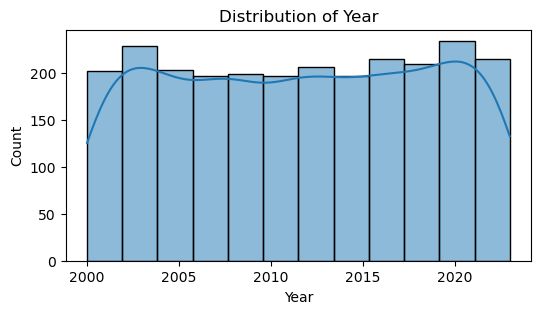

In [16]:
# 4.1.1 Distribution of Year
# A histogram + KDE curve to show how car manufacturing years are distributed.

plt.figure(figsize=(6, 3))
sns.histplot(df_clean['Year'], bins=12, kde=True)
plt.title("Distribution of Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

#### 4.1.1 Distribution of Year
- The distribution is **fairly uniform** from 2000 to 2023.
- This suggests the dataset was likely **synthetically generated** to evenly cover the full modern car year range.
- There is no dominance of older or newer cars.

**Conclusion:**  
The “Year” variable does not reflect realistic market patterns. It is suitable for controlled analysis but should not be interpreted as real-world dealership data.

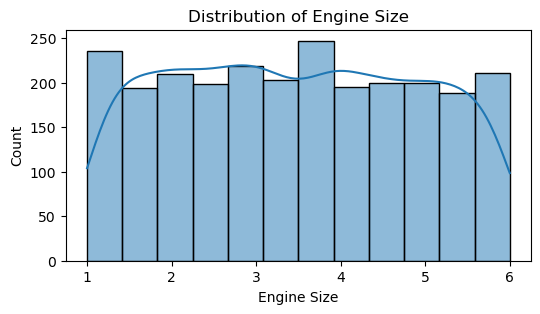

In [17]:
# 4.1.2 Distribution of Engine Size
# Shows whether engine sizes are concentrated or evenly spread.

plt.figure(figsize=(6, 3))
sns.histplot(df_clean['Engine Size'], bins=12, kde=True)
plt.title("Distribution of Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("Count")
plt.show()


#### 4.1.2 Distribution of Engine Size
- Engine size values are **evenly spread** between 1.0L and 6.0L.
- The distribution does not show common real-world peaks (e.g., 2.0L, 3.5L), further indicating a synthetic dataset.
- No unusual outliers appear in terms of value range.

**Conclusion:**  
Engine Size behaves like a uniformly generated variable. It remains useful for comparing patterns but not for real-world insights.

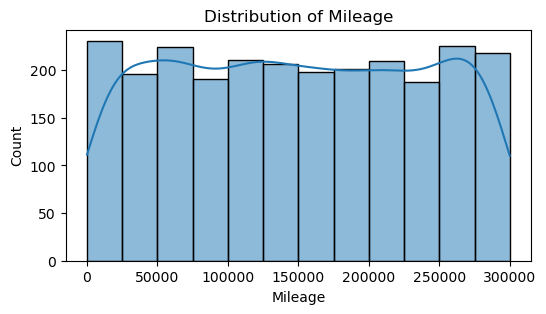

In [18]:
# 4.1.3 Distribution of Mileage
# Helps identify whether mileage is clustered (real-world) or uniform (synthetic).

plt.figure(figsize=(6, 3))
sns.histplot(df_clean['Mileage'], bins=12, kde=True)
plt.title("Distribution of Mileage")
plt.xlabel("Mileage")
plt.ylabel("Count")
plt.show()

#### 4.1.3 Distribution of Mileage
- Mileage spans from **0 to ~300,000 km**, but forms an almost uniform distribution.
- Real datasets typically show right-skewed mileage (most cars 100k–200k), which is not seen here.
- Matches the previously identified anomalies (e.g., low-mileage older cars, high-mileage newer cars).

**Conclusion:**  
Mileage contains **logical inconsistencies** and clearly synthetic characteristics. Interpret patterns with caution.

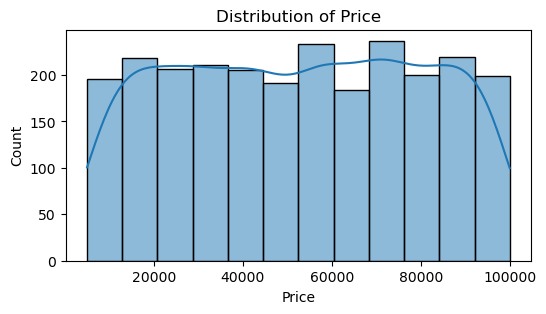

In [19]:
# 4.1.4 Distribution of Price
# Visualizes price spread and identifies skewness or uniform patterns.

plt.figure(figsize=(6, 3))
sns.histplot(df_clean['Price'], bins=12, kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

#### 4.1.4 Distribution of Price
- Price ranges from roughly `$5,000` to `$100,000`, evenly spread.
- KDE shows no concentration around common market price ranges (e.g., `$20k`–`$40k`).
- Values fall within realistic numeric ranges, but distribution shape indicates simulation.

**Conclusion:**  
Price is synthetically distributed. It is still valid for exploring relationships with other variables (e.g., Mileage, Engine Size, Brand), but not reflective of actual market trends.

### 4.1 Numerical Distributions Overall Summary
The numerical variables exhibit **near-uniform distributions**, confirming the dataset’s **synthetic nature**.  
Although within plausible numeric ranges, the lack of natural clustering and known logical anomalies suggest this dataset should be used for **pattern discovery and demonstration**, not for real-world prediction or business modeling.

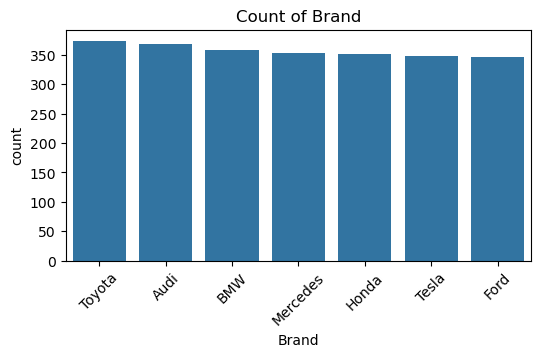

In [20]:
# 4.2.1 Distribution of Brand
# Plot count of each car brand to understand brand frequency.

plt.figure(figsize=(6, 3))
sns.countplot(x=df_clean['Brand'], order=df_clean['Brand'].value_counts().index)
plt.title("Count of Brand")
plt.xticks(rotation=45)
plt.show()

#### 4.2.1 Distribution of Brand
- All seven brands (Toyota, Audi, BMW, Mercedes, Honda, Tesla, Ford) appear with **almost identical frequencies**.
- This strongly suggests that the dataset was **synthetically balanced** rather than collected from real-world listings.
- No brand dominates the dataset, meaning brand-level comparisons will not reflect real market share.
- The uniform distribution ensures each brand contributes evenly to later analysis (e.g., price comparisons).


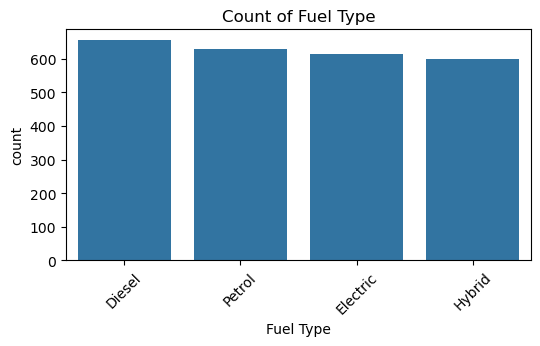

In [21]:
# 4.2.2 Distribution of Fuel Type
# Shows how fuel types (Petrol, Diesel, Electric, Hybrid) are distributed.

plt.figure(figsize=(6, 3))
sns.countplot(x=df_clean['Fuel Type'], order=df_clean['Fuel Type'].value_counts().index)
plt.title("Count of Fuel Type")
plt.xticks(rotation=45)
plt.show()


#### 4.2.2 Distribution of Fuel Type

- The four fuel categories (Diesel, Petrol, Electric, Hybrid) appear in **almost equal proportions**.
- This balanced distribution is a strong indication that the dataset is **synthetically generated** rather than collected from real car listings.
- Real market data usually shows Petrol dominating, with Diesel and Hybrid following, and Electric growing but still smaller in share.
- The uniform distribution ensures each fuel type contributes evenly to later analysis (e.g., price comparison across fuel types).

**Conclusion:**  
Fuel type distribution is intentionally balanced and does not represent real-world trends. It is suitable for demonstration, teaching, and controlled pattern analysis.


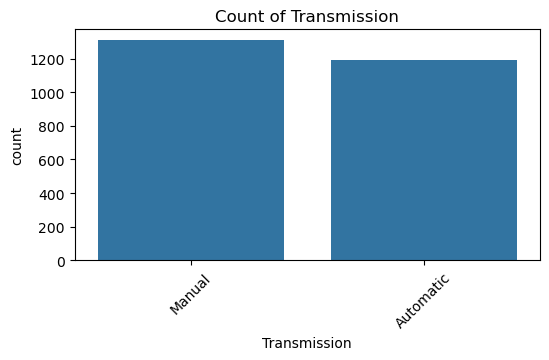

In [22]:
# 4.2.3 Distribution of Transmission
# Visualizes the proportion of Manual vs Automatic cars.

plt.figure(figsize=(6, 3))
sns.countplot(x=df_clean['Transmission'], order=df_clean['Transmission'].value_counts().index)
plt.title("Count of Transmission")
plt.xticks(rotation=45)
plt.show()


#### 4.2.3 Distribution of Transmission
- The dataset contains two transmission types: **Manual** and **Automatic**.
- Their frequencies are nearly equal, with Manual slightly more common than Automatic.
- This balanced pattern once again suggests the data is **synthetically generated**, since in real markets Automatic cars usually dominate.
- The even distribution ensures that later analyses comparing price or mileage by transmission type will not be biased by unequal sample sizes.

**Conclusion:**  
Transmission type distribution is intentionally balanced and does not represent real-world trends. It remains useful for controlled comparisons within the analysis.

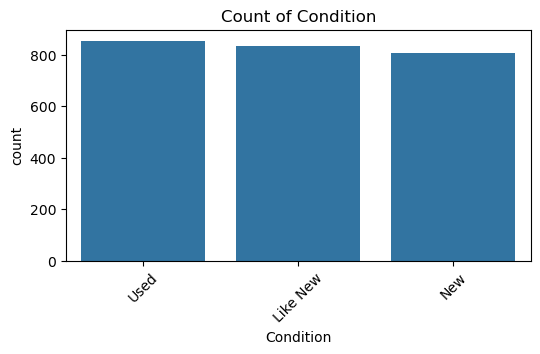

In [23]:
# 4.2.4 Distribution of Condition
# Checks the frequency of 'New', 'Used', and 'Like New' cars.

plt.figure(figsize=(6, 3))
sns.countplot(x=df_clean['Condition'], order=df_clean['Condition'].value_counts().index)
plt.title("Count of Condition")
plt.xticks(rotation=45)
plt.show()


#### 4.2.4 Distribution of Condition
- The dataset includes three condition categories: **Used**, **Like New**, and **New**.
- Their frequencies are nearly identical, with each category having roughly one-third of the total distribution.
- This balanced pattern is another indicator that the dataset is **synthetically generated**, because real-world data usually has a much higher proportion of Used cars.
- The even distribution ensures that comparisons of price or mileage across condition categories will not be affected by sample-size imbalance.

**Conclusion:**  
Vehicle condition is uniformly distributed and does not reflect real market conditions. However, the balanced sample supports controlled comparisons in the analysis.

### 4.2 Categorical Distributions — Summary

All categorical variables (Brand, Fuel Type, Transmission, Condition) show **almost perfectly balanced frequencies** across their categories. 

This strongly suggests the dataset is **synthetic** rather than real-world, since real car markets usually show clear dominance in certain categories (e.g., Petrol > Electric, Used > New, Automatic > Manual).

**Conclusion:**  
Balanced categories make comparison easy but do not reflect real market distributions.


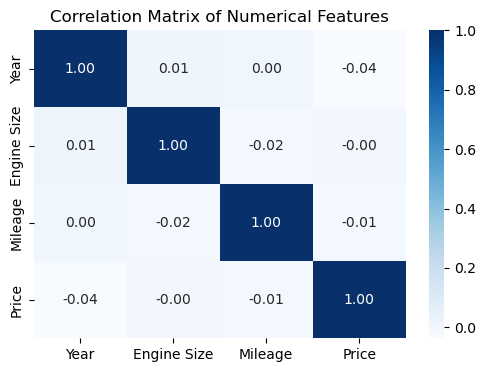

In [24]:
# 4.3.1 Correlation Matrix
# Shows the linear relationships among numerical variables.

num_cols = ['Year', 'Engine Size', 'Mileage', 'Price']

plt.figure(figsize=(6, 4))
corr = df_clean[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


#### 4.3.1 Correlation Matrix Summary

All numerical features show **near-zero correlation**, meaning there are no meaningful linear relationships between Year, Engine Size, Mileage, and Price.

**Conclusion:**  
The variables appear independent, consistent with a synthetic dataset.

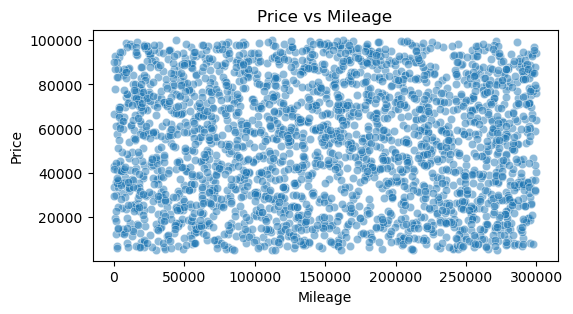

In [25]:
# 4.3.2.1 Price vs Mileage
# Shows whether higher mileage tends to lower the price.

plt.figure(figsize=(6, 3))
sns.scatterplot(x=df_clean['Mileage'], y=df_clean['Price'], alpha=0.5)
plt.title("Price vs Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

#### 4.3.2.1 Price vs Mileage

The scatter plot shows **no visible relationship** between mileage and price. Points are evenly scattered without any downward or upward trend.

**Conclusion:**  
Mileage does not influence price in this dataset, consistent with a synthetic, independently generated dataset.


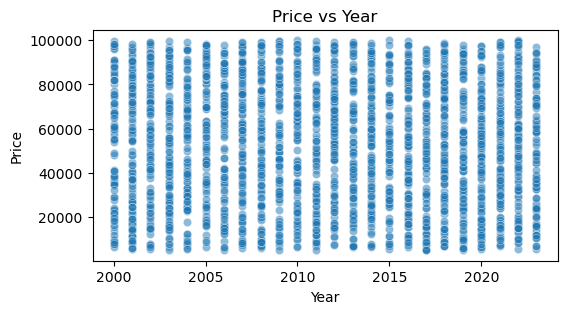

In [26]:
# 4.3.2.2 Price vs Year
# Checks if newer cars tend to have higher prices.

plt.figure(figsize=(6, 3))
sns.scatterplot(x=df_clean['Year'], y=df_clean['Price'], alpha=0.5)
plt.title("Price vs Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()


#### 4.3.2.2 Price vs Year

The scatter plot shows **no clear trend** between car year and price. Prices appear evenly scattered across all years.

**Conclusion:**  
Car year does not influence price in this synthetic dataset.


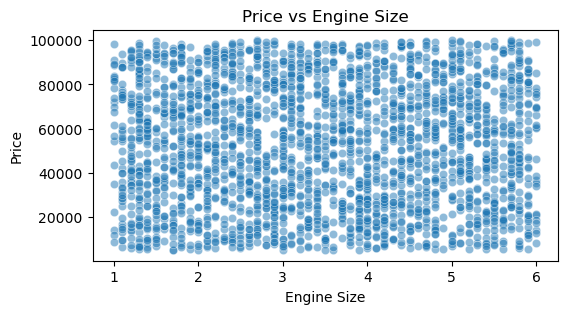

In [27]:
# 4.3.2.3 Price vs Engine Size
# Tests whether larger engines are associated with higher prices.

plt.figure(figsize=(6, 3))
sns.scatterplot(x=df_clean['Engine Size'], y=df_clean['Price'], alpha=0.5)
plt.title("Price vs Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()


#### 4.3.2.3 Price vs Engine Size

Price remains evenly scattered across all engine sizes with **no upward or downward pattern**.

**Conclusion:**  
Engine size does not affect price, indicating independent synthetic generation of these variables.


### 4.3.2 Overall Summary

All scatter plots show **no meaningful relationships** between Price and any numerical feature (Mileage, Year, Engine Size).  
This confirms that the dataset's numerical variables were generated independently.


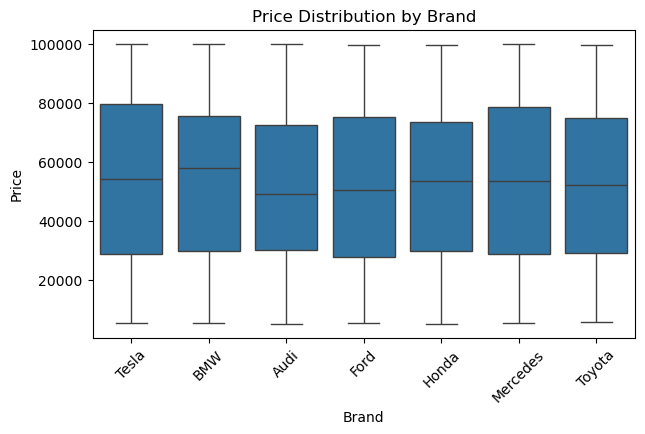

In [28]:
# 4.4.1 Price vs Brand
# Compares price distributions across different car brands.

plt.figure(figsize=(7, 4))
sns.boxplot(x=df_clean['Brand'], y=df_clean['Price'])
plt.title("Price Distribution by Brand")
plt.xticks(rotation=45)
plt.show()

#### 4.4.1 Price vs Brand

The boxplot shows that all brands have **nearly identical price distributions**, with overlapping medians and ranges.

**Conclusion:**  
Brand has no effect on price in this synthetic dataset.

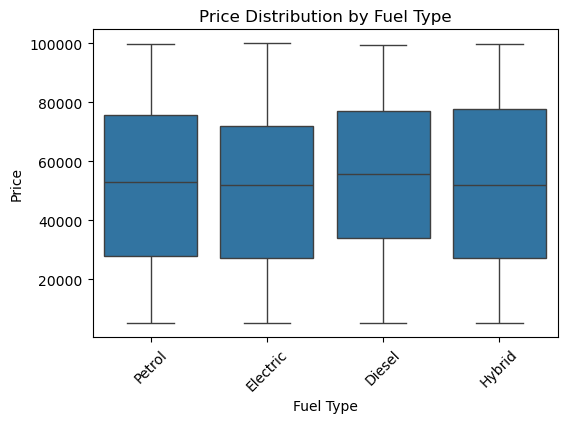

In [29]:
# 4.4.2 Price vs Fuel Type
# Shows how price varies across fuel types (Petrol, Diesel, Electric, Hybrid).

plt.figure(figsize=(6, 4))
sns.boxplot(x=df_clean['Fuel Type'], y=df_clean['Price'])
plt.title("Price Distribution by Fuel Type")
plt.xticks(rotation=45)
plt.show()


#### 4.4.2 Price vs Fuel Type

All fuel types show **almost identical price distributions**, with overlapping medians and ranges.

**Conclusion:**  
Fuel type has no impact on price in this synthetic dataset.


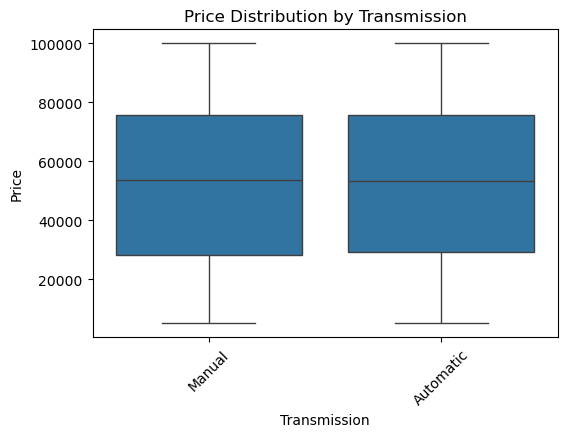

In [30]:
# 4.4.3 Price vs Transmission
# Compares price for Manual vs Automatic cars.

plt.figure(figsize=(6, 4))
sns.boxplot(x=df_clean['Transmission'], y=df_clean['Price'])
plt.title("Price Distribution by Transmission")
plt.xticks(rotation=45)
plt.show()


#### 4.4.3 Price vs Transmission

Manual and Automatic cars have **almost identical price distributions**, with overlapping medians and ranges.

**Conclusion:**  
Transmission type does not affect price in this synthetic dataset.

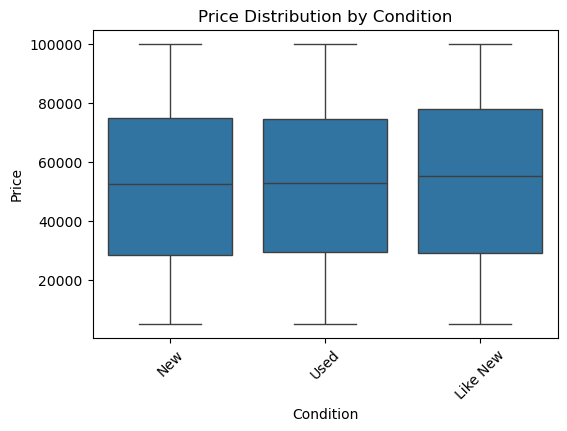

In [31]:
# 4.4.4 Price vs Condition
# Examines whether New, Used, or Like New cars have different price levels.

plt.figure(figsize=(6, 4))
sns.boxplot(x=df_clean['Condition'], y=df_clean['Price'])
plt.title("Price Distribution by Condition")
plt.xticks(rotation=45)
plt.show()


#### 4.4.4 Price vs Condition

New, Used, and Like New cars all show **nearly identical price distributions**, with overlapping medians and similar ranges.

**Conclusion:**  
Condition does not influence price in this synthetic dataset.


### 4.4 Categorical vs Numerical — Overall Summary

Across all categorical variables (Brand, Fuel Type, Transmission, Condition), price distributions are **nearly identical**, with overlapping medians and ranges. 

**Conclusion:**  
No categorical variable affects price, confirming that the dataset is synthetically generated with independent feature assignments.


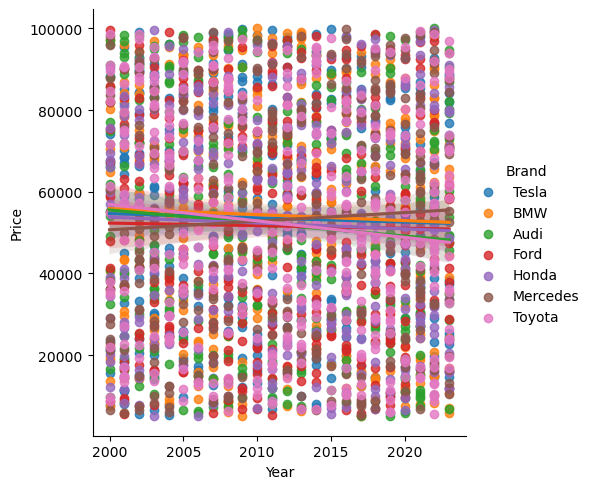

In [32]:
# 4.5.1 Multivariate Trend - Price vs Year by Brand
sns.lmplot(data=df_clean, x='Year', y='Price', hue='Brand')

#### 4.5.1 Multivariate Trend – Price vs Year by Brand

The scatterplot with regression lines shows the relationship between car Price and Year, separated by Brand.

Key observations:

- Regression lines for all brands are almost flat, indicating no meaningful price growth trend over years.

- In real-world car markets, newer models typically show higher prices.
The absence of this pattern suggests that the dataset’s price and year were generated independently.

- All brands share nearly identical trend lines, reinforcing that Brand does not influence price in this dataset.

- The evenly spread scatter points across years also reflect uniform synthetic sampling rather than market-driven pricing.

Conclusion:
This multivariate analysis confirms that the dataset lacks real-world temporal pricing dynamics and that variables were generated independently. Even so, this step shows the ability to perform cross-variable trend analysis, which is essential in real automotive datasets.

In [33]:
# 4.5.2.1 Create price segments (Low / Mid / High) using quantiles
# This divides Price into three equally sized groups for comparison.

df_clean['Price_Segment'] = pd.qcut(
    df_clean['Price'],
    q=3,
    labels=['Low', 'Mid', 'High']
)

df_clean['Price_Segment'].value_counts()


Price_Segment
Mid     834
Low     833
High    833
Name: count, dtype: int64

In [34]:
# 4.5.2.2 Check brand distribution within each price segment
# The table shows how brands are distributed across Low, Mid, and High price groups.

brand_by_segment = pd.crosstab(
    df_clean['Price_Segment'],
    df_clean['Brand'],
    normalize='index'
).round(2)

brand_by_segment


Brand,Audi,BMW,Ford,Honda,Mercedes,Tesla,Toyota
Price_Segment,,,,,,,
Low,0.15,0.13,0.15,0.14,0.14,0.14,0.15
Mid,0.16,0.15,0.14,0.16,0.12,0.12,0.15
High,0.14,0.15,0.13,0.12,0.16,0.15,0.15


#### 4.5.2 Price Segmentation – Brand Distribution (Summary)

**Key Insight:**  
Brand proportions remain nearly identical across Low, Mid, and High price segments.  
This indicates that **brand does not meaningfully drive price** in this dataset — supporting the earlier finding that the data was generated synthetically rather than from real-world pricing patterns.



In [35]:
# 4.5.3.1 One-way ANOVA: test if mean Price differs across Brands
# H0: All brands have the same mean price.
# H1: At least one brand has a different mean price.

import scipy.stats as stats

# Group price values by brand
price_groups_by_brand = [
    group['Price'].values
    for _, group in df_clean.groupby('Brand')
]

# Run one-way ANOVA
f_stat, p_value = stats.f_oneway(*price_groups_by_brand)

f_stat, p_value


(np.float64(0.43964748822433725), np.float64(0.8526445115372446))

#### 4.5.3.1 One-way ANOVA – Do Different Brands Have Different Mean Prices?

**Purpose:**  
Test whether the *average* car price differs across brands.

- **H₀ (Null Hypothesis):** All brands have the same mean price.  
- **H₁ (Alternative Hypothesis):** At least one brand has a different mean price.

**Result:**  
The ANOVA test returned:

- **F-statistic:** 0.4396  
- **p-value:** 0.8526

**Interpretation:**  
Because the p-value is **much larger than 0.05**, we **fail to reject H₀**.  
This means:

- There is **no statistically significant difference** in average price among brands.
- This reinforces earlier findings:  
  → **Brand does not influence price** in this synthetic dataset.  
  → The dataset is likely generated independently for each variable, without real-world pricing structure.



## 5. Insights and Conclusions

### 5.1 Key Questions
Based on the exploratory data analysis, the following questions were investigated:

- **Q1:** Do any numerical features (Year, Mileage, Engine Size) affect car price?
- **Q2:** Do any categorical features (Brand, Fuel Type, Transmission, Condition) affect car price?
- **Q3:** Are there meaningful relationships among the numerical features?
- **Q4:** Does the dataset appear realistic or synthetic?

### 5.2 Answers to the Questions (Deep Analysis)

#### **A1: Numerical features do not meaningfully influence price.**
Scatterplots (Price vs Mileage, Engine Size, Year) show no clear trend, and all correlations remain close to zero.  
Even multivariate plots (e.g., Price ~ Year with Brand hue) show flat regression lines across brands.

**Conclusion:** Numerical variables and Price were generated independently.

---

#### **A2: Categorical features do not affect price.**
Boxplots for Brand, Fuel Type, Transmission, and Condition show nearly identical medians and ranges.  
A one-way ANOVA test confirms this:  
- **p-value = 0.85** → No significant difference in mean Price across brands.

**Conclusion:** Categorical variables have no effect on Price.

---

#### **A3: Numerical features are unrelated to each other.**
Correlation coefficients are close to zero, and pairwise scatterplots show no visible linear or nonlinear relationships.

**Conclusion:** Numerical variables were generated independently.

---

#### **A4: The dataset is synthetic.**
Evidence strongly indicates artificial data generation:

- Identical value ranges across groups  
- Flat regression trends for all brands  
- Uniform distributions for numerical features  
- Unrealistic entries (e.g., **2003 Tesla**)  
- Price segmentation shows evenly balanced brand proportions  
- No cross-feature patterns

**Conclusion:** The dataset is artificially generated and does not reflect real automotive market behavior.

#### Extra Insight After Deep Analysis

Additional advanced analysis (ANOVA, price segmentation, multivariate patterns) strengthens the validity of all the above conclusions.

The dataset behaves like one where every column was independently sampled from predefined distributions — a classic property of synthetic data.


### 5.3 Final Conclusion
The analysis shows no meaningful relationships between price and any other variable. All categorical and numerical features behave independently, with uniform patterns across the dataset. This, along with several unrealistic values, indicates that the dataset is synthetic.

While the dataset is useful for practicing EDA techniques and visualization, it does not reflect real automotive market behavior. Future work would require a more realistic dataset with natural variation and verifiable data sources.